In [1]:
#################################################
# DEPENDENCIES declaration
#################################################

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy import create_engine, MetaData, Table, Column, ForeignKey
from sqlalchemy.ext.automap import automap_base
from flask import Flask, jsonify

# Reflect Tables into SQLAlchemy ORM
- SQLAlchemy ORM queries, Pandas, and Matplotlib.


In [2]:
#################################################
# Use SQLAlchemy create_engine to connect to your sqlite database.
#################################################
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
#################################################
# Collect the names of tables within the database
#################################################
engine.table_names()
print(engine.table_names())

['measurement', 'station']


In [4]:
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
print(f'Columns in measurement table:')
for c in columns:
    print(c['name'], c["type"])

    
columns = inspector.get_columns('station')
print(f'Columns in station table:')
for c in columns:
    print(c['name'], c["type"])

Columns in measurement table:
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Columns in station table:
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [5]:
#################################################
# reflect an existing database into a new model
#################################################
Base = automap_base()
#################################################
# reflect the tables
#################################################
Base.prepare(engine, reflect=True)

#################################################
# We can view all of the classes that automap found
#################################################
Base.classes.keys()

session = Session(engine)

#################################################
# Save references to each table
#################################################
Measurement = Base.classes.measurement
Station = Base.classes.station
print(Base.classes.keys())

['measurement', 'station']


In [6]:
#################################################
# Design a query to retrieve the last 12 months 
# of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#################################################
last_date = session.query(func.max(Measurement.date)).scalar()
last_date

date_time_obj = dt.datetime.strptime(last_date, '%Y-%m-%d')
year = dt.timedelta(days=365)

last_date_last_year = date_time_obj - year
# print('Last date detected on data:', last_date)
print('Last date detected on data:', date_time_obj)
print('Last date from previous year on data:', last_date_last_year)
# print(last_date_last_year)

Last date detected on data: 2017-08-23 00:00:00
Last date from previous year on data: 2016-08-23 00:00:00


In [7]:
#################################################
# Perform a query to retrieve the data and precipitation scores
#################################################
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date_last_year).order_by(Measurement.date).all()
# precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>="2016-08-23").all()
# precipitation


#################################################
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
#################################################
df = pd.DataFrame(precipitation)
df.columns = precipitation[0].keys()
df.set_index("date").fillna(0).head(10)
# df.sort_values(by=['date'], ascending=False)
# df.set_index("date").dropna().head(10)
# df.set_index("date")

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,0.00
2016-08-24,1.22
2016-08-24,2.15
2016-08-24,1.45
2016-08-25,0.08
2016-08-25,0.08


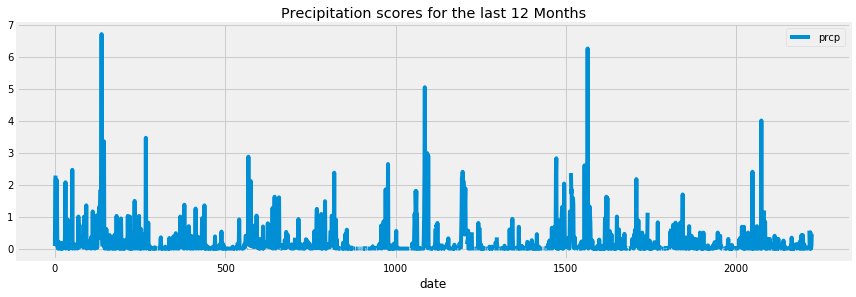

In [8]:
#################################################
# Use Pandas Plotting with Matplotlib to plot the data
#################################################
df.plot(figsize=(12, 4), x_compat=True)
# df.plot('date','prcp')
# df.plot('date', 'prcp', figsize=(12, 8), x_compat=True, color='green')
#set the title
plt.title('Precipitation scores for the last 12 Months')
plt.tight_layout()
plt.xlabel('date')   
# plt.legend("hola")
# plt.legend('Precipitation')          
#rotate the x labels 45 degrees
# plt.xticks(rotation=45)
#make it a tight layout
plt.show()

In [9]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [10]:
#################################################
# Precipitation Analysis
# Design a query to show how many stations are available in this dataset?
#################################################
station_number = session.query(Measurement.station, func.count(Measurement.date)).group_by(Measurement.station).all()
print('TOTAL AMOUNT OF STATIONS DETECTED IN DATASET:', len(station_number))
# type(station_number)
# len(station_number)

TOTAL AMOUNT OF STATIONS DETECTED IN DATASET: 9


In [11]:
#################################################
# Design a query to find the most active stations.
# List the stations and observation counts in descending order.
#################################################
most_active = session.query(Measurement.station, func.count(Measurement.tobs)).\
group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
# Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

# Which station has the highest number of observations?
print(f'MOST ACTIVE STATION DETECTED IS: \n STATION {most_active[0][0]} WITH {most_active[0][1]} TOBS OCURRENCES.\n')

MOST ACTIVE STATION DETECTED IS: 
 STATION USC00519281 WITH 2772 TOBS OCURRENCES.



In [12]:
i = 1
for row, ocurrences in most_active:
#     print(row, ocurrences)
    print(f'THE TOP {i} STATION DETECTED IS:\n STATION {row} WITH {ocurrences} TOBS OCURRENCES.\n')
    i += 1

THE TOP 1 STATION DETECTED IS:
 STATION USC00519281 WITH 2772 TOBS OCURRENCES.

THE TOP 2 STATION DETECTED IS:
 STATION USC00519397 WITH 2724 TOBS OCURRENCES.

THE TOP 3 STATION DETECTED IS:
 STATION USC00513117 WITH 2709 TOBS OCURRENCES.

THE TOP 4 STATION DETECTED IS:
 STATION USC00519523 WITH 2669 TOBS OCURRENCES.

THE TOP 5 STATION DETECTED IS:
 STATION USC00516128 WITH 2612 TOBS OCURRENCES.

THE TOP 6 STATION DETECTED IS:
 STATION USC00514830 WITH 2202 TOBS OCURRENCES.

THE TOP 7 STATION DETECTED IS:
 STATION USC00511918 WITH 1979 TOBS OCURRENCES.

THE TOP 8 STATION DETECTED IS:
 STATION USC00517948 WITH 1372 TOBS OCURRENCES.

THE TOP 9 STATION DETECTED IS:
 STATION USC00518838 WITH 511 TOBS OCURRENCES.



In [13]:
#################################################
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
#################################################
tobs_data = session.query(Measurement.station, Measurement.date, Measurement.prcp, \
                          Measurement.tobs).filter(Measurement.station == 'USC00519281').\
                            filter(Measurement.date >= last_date_last_year).order_by(Measurement.date).all()
# tobs_data

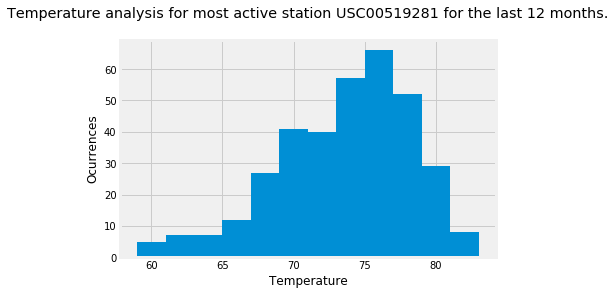

In [ ]:
#################################################
# Plot the results as a histogram with bins=12. 
#################################################
bins_df =pd.DataFrame(tobs_data)
plt.hist(bins_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Ocurrences")
plt.title(f'Temperature analysis for most active station {most_active[0][0]} for the last 12 months.\n')
plt.show()

In [ ]:
#################################################
# Flask Setup
#################################################
app = Flask(__name__)
#################################################
# Flask Routes
#################################################

from flask import request

@app.route("/")
def welcome():
    return (
        f"Welcome to the API Home page:<br/>"
        f"Available Routes:<br/>"
#         f"/api/v1.0/justice-league" 
        
        f"--/api/v1.0/precipitation<br/>"
        f"--/api/v1.0/stations<br/>"
        f"--/api/v1.0/tobs<br/>"
        f"--/api/v1.0/<start> <br/>" 
        f"--/api/v1.0/<start>/<end>"
    )
#################################################
# /api/v1.0/precipitation
# Convert the query results to a Dictionary using date as the key and prcp as the value.
# Return the JSON representation of your dictionary.
#################################################
@app.route("/api/v1.0/precipitation")
def precipitation():
    # Query all 
    results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_date_last_year).order_by(Measurement.date).all()

    # Create a dictionary from the row data and append to a list of all_precipitations
    all_precipitations = []
    for result in results:
        precipitation_dict = {}
        precipitation_dict["date"] = result.date
        precipitation_dict["prcp"] = result.prcp
        all_precipitations.append(precipitation_dict)

    return jsonify(all_precipitations)

#################################################
# /api/v1.0/stations
# Return a JSON list of stations from the dataset (and also count of stations).
#################################################
@app.route("/api/v1.0/stations")
def stations():
    # Query all 
    station_results = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).all()

    # return jsonify(all_stations)
    all_stations = list(np.ravel(station_results))
    return jsonify(all_stations)

#################################################
# /api/v1.0/tobs
# Query for the dates and temperature observations from a year from the last data point.
# Return a JSON list of Temperature Observations (tobs) for the previous year.
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
#################################################
tobs_data = session.query(Measurement.station, Measurement.date,\
                          Measurement.tobs).\
                            filter(Measurement.date >= last_date_last_year).order_by(Measurement.date).all()
    
@app.route("/api/v1.0/tobs")
def tobs():
    # Query all 
    all_tobs = list(np.ravel(tobs_data))
    return jsonify(all_tobs)
#################################################
# /api/v1.0/<start> and /api/v1.0/<start>/<end>
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature 
# for a given start or start-end range.
# When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal
# to the start date.
#################################################
@app.route("/api/v1.0/<start>")
def startdata(start):
    start_data = session.query(Measurement.date, func.avg(Measurement.tobs),\
                                  func.max(Measurement.tobs), func.min(Measurement.tobs)).\
                            filter(Measurement.date >= start).\
                            order_by(Measurement.date).all()

#Create JSON
    data_list = []
    for result in start_data:
        row = {}
        row['date'] = result[0]
        row['avg'] = float(result[1])
        row['max'] = float(result[2])
        row['min'] = float(result[3])
        data_list.append(row)

    return jsonify(data_list) 

    
@app.route("/api/v1.0/<start>/<end>")
def startdataend(start, end):
    start_dataend = session.query(Measurement.date, func.avg(Measurement.tobs),\
                                  func.max(Measurement.tobs), func.min(Measurement.tobs)).\
                            filter(Measurement.date >= start).filter(Measurement.date <= end).\
                            order_by(Measurement.date).all()
#Create JSON
    dataend_list = []
    for result in start_dataend:
        row = {}
        row['date'] = result[0]
        row['avg'] = float(result[1])
        row['max'] = float(result[2])
        row['min'] = float(result[3])
        dataend_list.append(row)

    return jsonify(dataend_list) 

if __name__ == "__main__":
    app.run()
#     app.run(debug=True)
last_date_last_year

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
